# Import libraries

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#import TrainingCurves
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import learning_curve

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


# Read datasets

In [2]:
#phishing = pd.read_csv('PhishingData.csv', names = ["SFH","popUpWindow", "SSLfinal_State", "Request_URL", "URL_of_Anchor", "web_traffic", "URL_Length", "age_of_domain", "having_IP_Address", "Result"])
phishing = pd.read_csv('Phishing.csv')

In [3]:
phishing.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,-1


# Information about the datasets

In [4]:
phishing.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,...,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000
mean,0.113192,-0.649837,0.122964,0.054560,0.125407,-0.254886,-0.185668,0.255700,0.018730,0.189739,...,0.196254,0.092020,-0.003257,0.536645,0.304560,-0.540717,0.139658,0.344463,0.179153,-0.109121
std,0.316892,0.752690,0.328463,0.227166,0.331247,0.676170,0.802068,0.912332,0.798455,0.392175,...,0.397244,0.289112,0.939726,0.498757,0.834146,0.757832,0.346702,0.568911,0.383559,0.994231
min,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000
25%,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000
50%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000
75%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
phishing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,2456.0,0.113192,0.316892,0.0,0.0,0.0,0.0,1.0
URL_Length,2456.0,-0.649837,0.752690,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,2456.0,0.122964,0.328463,0.0,0.0,0.0,0.0,1.0
having_At_Symbol,2456.0,0.054560,0.227166,0.0,0.0,0.0,0.0,1.0
double_slash_redirecting,2456.0,0.125407,0.331247,0.0,0.0,0.0,0.0,1.0
Prefix_Suffix,2456.0,-0.254886,0.676170,-1.0,-1.0,0.0,0.0,1.0
having_Sub_Domain,2456.0,-0.185668,0.802068,-1.0,-1.0,0.0,0.0,1.0
SSLfinal_State,2456.0,0.255700,0.912332,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,2456.0,0.018730,0.798455,-1.0,-1.0,0.0,1.0,1.0
Favicon,2456.0,0.189739,0.392175,0.0,0.0,0.0,0.0,1.0


In [6]:
#pd.to_numeric(phishing.SFH, errors = "coerce")
#pd.to_numeric(phishing.popUpWindow, errors = "coerce")
#pd.to_numeric(phishing.SSLfinal_State, errors = "coerce")
#pd.to_numeric(phishing.Request_URL, errors = "coerce")
#pd.to_numeric(phishing.URL_of_Anchor, errors = "coerce")
#pd.to_numeric(phishing.web_traffic, errors = "coerce")
#pd.to_numeric(phishing.URL_Length, errors = "coerce")
#pd.to_numeric(phishing.age_of_domain, errors = "coerce")
#pd.to_numeric(phishing.having_IP_Address, errors = "coerce")
#pd.to_numeric(phishing.Result, errors = "coerce")
#inplace = True
phishing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2456 non-null   int64
 1   URL_Length                   2456 non-null   int64
 2   Shortining_Service           2456 non-null   int64
 3   having_At_Symbol             2456 non-null   int64
 4   double_slash_redirecting     2456 non-null   int64
 5   Prefix_Suffix                2456 non-null   int64
 6   having_Sub_Domain            2456 non-null   int64
 7   SSLfinal_State               2456 non-null   int64
 8   Domain_registeration_length  2456 non-null   int64
 9   Favicon                      2456 non-null   int64
 10  port                         2456 non-null   int64
 11  HTTPS_token                  2456 non-null   int64
 12  Request_URL                  2456 non-null   int64
 13  URL_of_Anchor                2456 non-null   int

In [7]:
phishing.Result.unique()

array([ 1, -1], dtype=int64)

#### I have 1353 data points with 9 numeric features, 
#### the values of the features are -1, 0, 1 respectively. 

## Check the distribution of the result

In [8]:
phishing['Result'].value_counts()*100.0/len(phishing)

-1    55.456026
 1    44.543974
Name: Result, dtype: float64

<AxesSubplot:>

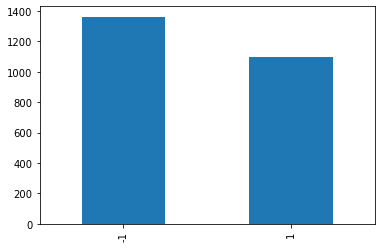

In [9]:
phishing['Result'].value_counts().plot(kind='bar')

#### It looks that this dataset is not balanced
#### I will make the dataset balance by applying over-sampling

# Variables Selection

In [10]:
#correlation = phishing.corr()
correlation_result = abs(phishing.corr()['Result'])
print(correlation_result)

having_IP_Address              0.061623
URL_Length                     0.055605
Shortining_Service             0.061175
having_At_Symbol               0.008336
double_slash_redirecting       0.042536
Prefix_Suffix                  0.537020
having_Sub_Domain              0.266514
SSLfinal_State                 0.712876
Domain_registeration_length    0.260157
Favicon                        0.005067
port                           0.038609
HTTPS_token                    0.039071
Request_URL                    0.243759
URL_of_Anchor                  0.699608
Links_in_tags                  0.204575
SFH                            0.067708
Submitting_to_email            0.012178
Abnormal_URL                   0.052093
Redirect                       0.052760
on_mouseover                   0.042706
RightClick                     0.006811
popUpWidnow                    0.002677
Iframe                         0.007565
age_of_domain                  0.300330
DNSRecord                      0.183854


#### It looks that some features are not very relevant
#### Therefore, I will try to drop these features 
#### and only keep features with  correlation > 0.15

##  Create a list for predictors

In [11]:
s_features = correlation_result[correlation_result > 0.15]
print(s_features)

Prefix_Suffix                  0.537020
having_Sub_Domain              0.266514
SSLfinal_State                 0.712876
Domain_registeration_length    0.260157
Request_URL                    0.243759
URL_of_Anchor                  0.699608
Links_in_tags                  0.204575
age_of_domain                  0.300330
DNSRecord                      0.183854
web_traffic                    0.535545
Page_Rank                      0.350812
Google_Index                   0.151763
Result                         1.000000
Name: Result, dtype: float64


In [12]:
p_list = ['Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 
          'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'age_of_domain',
          'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index']

## Prepare training and testing datasets

In [13]:
count_n1, count_1 = phishing['Result'].value_counts()
#print(count_n1, count_1)
# divide by class
class_n1 = phishing[phishing['Result'] == -1]
class_1 = phishing[phishing['Result'] == 1]


In [14]:
class_1_over = class_1.sample(count_n1, replace=True)
#class_0_over = class_0.sample(count_n1, replace=True)

data_over = pd.concat([class_n1, class_1_over], axis=0)
#test_0_over = pd.concat([class_n1, class_0_over], axis=0)

print('Random over-sampling:')
print(data_over.Result.value_counts())

Random over-sampling:
-1    1362
 1    1362
Name: Result, dtype: int64


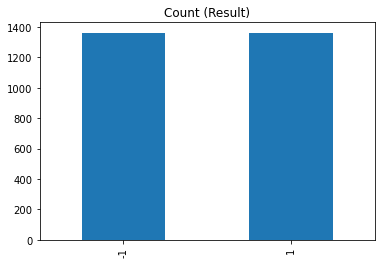

In [15]:
data_over.Result.value_counts().plot(kind='bar', title='Count (Result)');

In [17]:
data_over['Result'].value_counts()*100.0/len(data_over)

-1    50.0
 1    50.0
Name: Result, dtype: float64

In [18]:
data_over.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2724 entries, 4 to 1204
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2724 non-null   int64
 1   URL_Length                   2724 non-null   int64
 2   Shortining_Service           2724 non-null   int64
 3   having_At_Symbol             2724 non-null   int64
 4   double_slash_redirecting     2724 non-null   int64
 5   Prefix_Suffix                2724 non-null   int64
 6   having_Sub_Domain            2724 non-null   int64
 7   SSLfinal_State               2724 non-null   int64
 8   Domain_registeration_length  2724 non-null   int64
 9   Favicon                      2724 non-null   int64
 10  port                         2724 non-null   int64
 11  HTTPS_token                  2724 non-null   int64
 12  Request_URL                  2724 non-null   int64
 13  URL_of_Anchor                2724 non-null   int

In [19]:
data_over.shape

(2724, 31)

#### Now I have a balanced dataset

In [20]:
traindata = pd.DataFrame(data_over,dtype=np.float)

<ipython-input-20-52bbba493811>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  traindata = pd.DataFrame(data_over,dtype=np.float)


In [21]:
# I have 2106 datapoints with 9 features
# divide the dataset into training set and testing set using SciKit-Learn

X = data_over.drop('Result', axis=1)
y = data_over['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
# scale the dataset before training 

scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Decision Tree 

In [36]:
DT_classifier = DecisionTreeClassifier(max_leaf_nodes=20,random_state=0,criterion='gini')
DT_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)

In [37]:
DT_predict = DT_classifier.predict(X_test)

In [45]:
accuracy_score(y_test,DT_predict)

0.9504587155963303

In [39]:
conf_matrix_train = pd.DataFrame(confusion_matrix(y_test, DT_predict))
print(conf_matrix_train)

     0    1
0  252   22
1    5  266


In [49]:
def DT_grid_search(X, y, verbose = 0):
    param_grid = {'criterion':['gini', 'entropy', 'rbf'], 
                 'max_depth': np.arange(1,20),
                 'class_weight':['balanced', None],
                 #'min_samples_leaf':[2, 3, 5, 10],
                 }
    base_estimator = DecisionTreeClassifier(random_state = 1)
    DT_gs = GridSearchCV(base_estimator, param_grid, cv = 10)#, 
                         #verbose = verbose, scoring="balanced_accuracy")
    DT_gs.fit(X,y)
    #if verbose:
    #    print(DT_gs.cv_results_)
    return DT_gs

res = DT_grid_search(X_train, y_train)
print('best parameters:', res.best_params_, 'best score:', res.best_score_)

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 16} best score: 0.9756817317042238


D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

In [48]:
import time
from tqdm import tqdm

cv_best_score = 0
cv_best_params = None 

base_estimator = DecisionTreeClassifier(random_state = 1)
param_grid = {'criterion':['gini', 'entropy', 'rbf'], 
                 'max_depth': np.arange(1,20),
                 'class_weight':['balanced', None],
                 #'min_samples_leaf':[2, 3, 5, 10],
                 }
for cv in tqdm(range(3, 10)):
    create_grid = GridSearchCV(base_estimator, param_grid=param_grid, cv=cv, n_jobs=1)
    create_grid.fit(X_train, y_train)
    cv_score = create_grid.score(X_test, y_test)
    cv_params = create_grid.best_params_
    print("Score for %d fold CV := %5.4f" %(cv, cv_score))
    print("!!!!Best fit parameters from GridSearchCV !!!!")
    print(cv_params)
    if(cv_score > cv_best_score):
        cv_best_score = cv_score
        cv_best_params = cv_params

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: Fi

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

Score for 3 fold CV := 0.9798
!!!!Best fit parameters from GridSearchCV !!!!
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 16}


D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

Score for 4 fold CV := 0.9798
!!!!Best fit parameters from GridSearchCV !!!!
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 16}


D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

 43%|████████████████████████████████████                                                | 3/7 [00:05<00:07,  1.83s/it]

Score for 5 fold CV := 0.9817
!!!!Best fit parameters from GridSearchCV !!!!
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 19}


D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

Score for 6 fold CV := 0.9780
!!!!Best fit parameters from GridSearchCV !!!!
{'class_weight': None, 'criterion': 'gini', 'max_depth': 15}


D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

Score for 7 fold CV := 0.9780
!!!!Best fit parameters from GridSearchCV !!!!
{'class_weight': None, 'criterion': 'gini', 'max_depth': 16}


D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

Score for 8 fold CV := 0.9780
!!!!Best fit parameters from GridSearchCV !!!!
{'class_weight': None, 'criterion': 'gini', 'max_depth': 16}


D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:19<00:00,  2.74s/it]

Score for 9 fold CV := 0.9798
!!!!Best fit parameters from GridSearchCV !!!!
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 16}


In [100]:
res.cv_results_

{'mean_fit_time': array([0.00219841, 0.00220709, 0.00419745, 0.00419283, 0.00279846,
        0.00279994, 0.00319557, 0.00299935, 0.00359778, 0.00339842,
        0.00299902, 0.00319724, 0.00299535, 0.00319529, 0.00299726,
        0.00319757, 0.003403  , 0.00339789, 0.00319395, 0.00139837,
        0.00220137, 0.00219855, 0.00220351, 0.00279832, 0.00300078,
        0.00259757, 0.00319877, 0.00299582, 0.00299969, 0.00299554,
        0.00319943, 0.00319695, 0.0032001 , 0.00319796, 0.00340104,
        0.00319772, 0.00340133, 0.00379734]),
 'std_fit_time': array([3.99971207e-04, 4.04872359e-04, 9.78724705e-04, 1.16402297e-03,
        3.99710567e-04, 4.02940473e-04, 3.98616026e-04, 2.04762559e-06,
        4.97190959e-04, 4.91346923e-04, 1.74811390e-06, 3.91729355e-04,
        4.59498852e-06, 3.94582878e-04, 1.96373561e-06, 3.99518052e-04,
        4.92995326e-04, 4.89630140e-04, 3.93105363e-04, 4.90721861e-04,
        4.04930143e-04, 3.99780444e-04, 4.03885419e-04, 3.99828540e-04,
        5.243

### Learning Curve

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)

## Neural Networks

In [21]:
#train the training set

mlp = MLPClassifier(hidden_layer_sizes=(9,9,9), max_iter=1000)

In [22]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(9, 9, 9), max_iter=1000)

In [23]:
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 9, 9), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

MLPClassifier(hidden_layer_sizes=(9, 9, 9), max_iter=1000)

In [24]:
predictions = mlp.predict(X_test)

In [26]:
print(confusion_matrix(y_test,predictions))

[[156   3  14]
 [  4  13   8]
 [ 15   7 119]]


In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.89      0.90      0.90       173
           0       0.57      0.52      0.54        25
           1       0.84      0.84      0.84       141

    accuracy                           0.85       339
   macro avg       0.77      0.76      0.76       339
weighted avg       0.85      0.85      0.85       339



## Support Vector Machine

## visualize the dataset

In [ ]:
sns.scatterplot(x='')

In [ ]:
f1_score_test = []
fi_score_train = []
kernel_list = ['linear', 'poly', 'rbf']
for kernel in kernel_list:
    if 